In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

###1. Data Exploration and Understanding

In [2]:
df = pd.read_csv("Walmart.csv")

#####Display basic information

In [3]:
print("\nDataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [4]:
print("\nDataFrame Head:")
print(df.head())


DataFrame Head:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [5]:
print("\nDataFrame Description:")
print(df.describe().transpose())


DataFrame Description:
               count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI        

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


###2. Data Cleaning and Transformation

In [7]:
print("Original dataset shape:", df.shape)
print("\nOriginal data types:")
print(df.dtypes)

Original dataset shape: (6435, 8)

Original data types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
6430,False
6431,False
6432,False
6433,False


#####Convert 'Date' column to datetime objects

In [9]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

#####Extract additional date features

In [10]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week
df["Quarter"] = df["Date"].dt.quarter

In [11]:
# Analyze sales trends across different stores
store_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

print("\nAverage Weekly Sales per Store (Top 10):")
print(store_sales.head(10))

print("\nAverage Weekly Sales per Store (Bottom 10):")
print(store_sales.tail(10))


Average Weekly Sales per Store (Top 10):
Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
10    1.899425e+06
27    1.775216e+06
6     1.564728e+06
1     1.555264e+06
39    1.450668e+06
Name: Weekly_Sales, dtype: float64

Average Weekly Sales per Store (Bottom 10):
Store
29    539451.428741
16    519247.730070
37    518900.281958
30    438579.616224
3     402704.441049
38    385731.653287
36    373511.992797
5     318011.810490
44    302748.866014
33    259861.692028
Name: Weekly_Sales, dtype: float64


#####3. Top 5 stores by average weekly sales

In [12]:
top_5_stores = df.groupby("Store")["Weekly_Sales"].mean().nlargest(5)
print("\n3. Top 5 Stores by Average Weekly Sales:")
print(top_5_stores.apply(lambda x: f'{x:,.2f}'))


3. Top 5 Stores by Average Weekly Sales:
Store
20    2,107,676.87
4     2,094,712.96
14    2,020,978.40
13    2,003,620.31
2     1,925,751.34
Name: Weekly_Sales, dtype: object


In [13]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1


#####yearly sales

In [14]:
yearly_sales = df.groupby("Year")["Weekly_Sales"].sum()
print("\nYearly Sales Trend:")
print(yearly_sales.apply(lambda x: f'{x:,.2f}'))


Yearly Sales Trend:
Year
2010    2,288,886,120.41
2011    2,448,200,007.35
2012    2,000,132,859.35
Name: Weekly_Sales, dtype: object


#####4. Weekly Sales trend by Quarter

In [15]:
sales_by_quarter = df.groupby("Quarter")["Weekly_Sales"].mean().sort_index()
print("\n4. Average Weekly Sales by Quarter:")
print(sales_by_quarter.apply(lambda x: f'{x:,.2f}'))


4. Average Weekly Sales by Quarter:
Quarter
1    1,006,136.18
2    1,040,806.41
3    1,023,251.31
4    1,128,773.58
Name: Weekly_Sales, dtype: object


#####Average Weekly Sales per Store

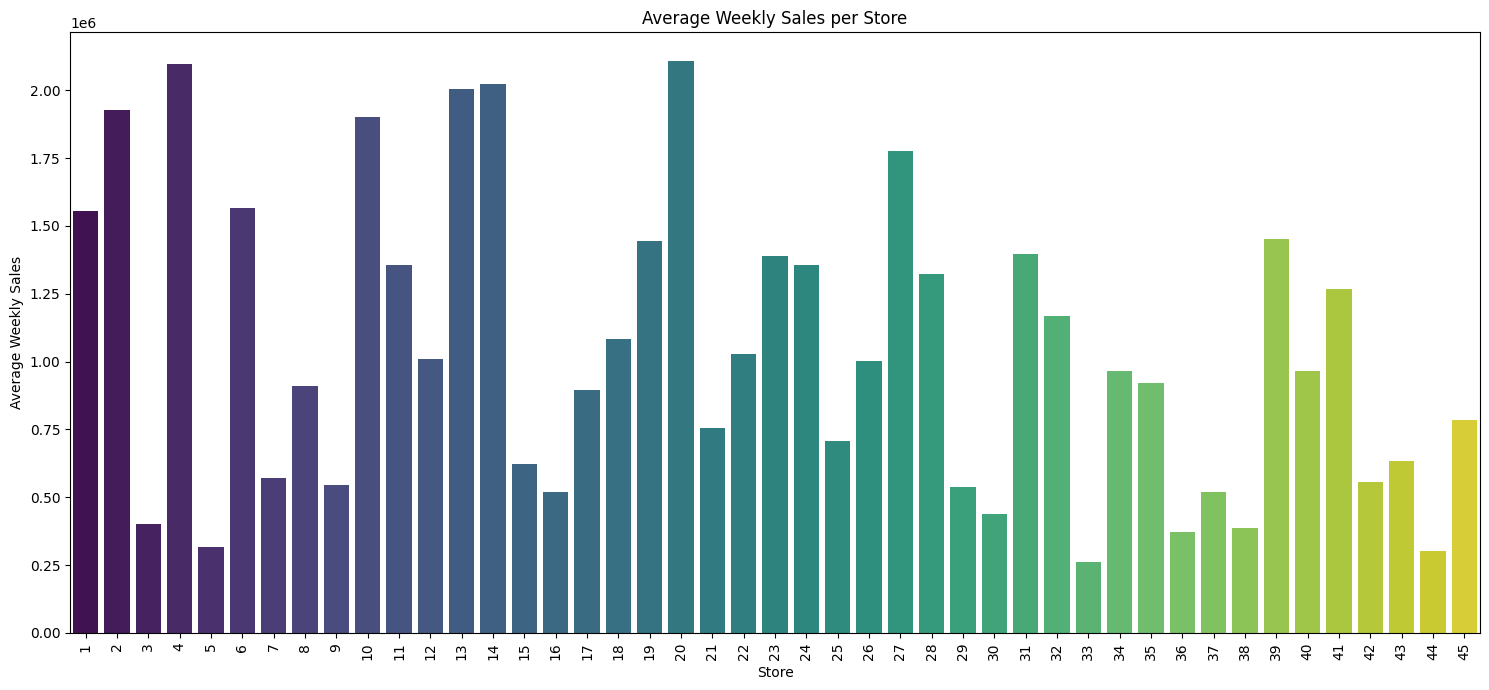

In [16]:
plt.figure(figsize=(15, 7))
sns.barplot(x=store_sales.index, y=store_sales.values, palette="viridis")
plt.title("Average Weekly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

####Time series plot of Weekly Sales

Text(0, 0.5, 'Total Weekly Sales')

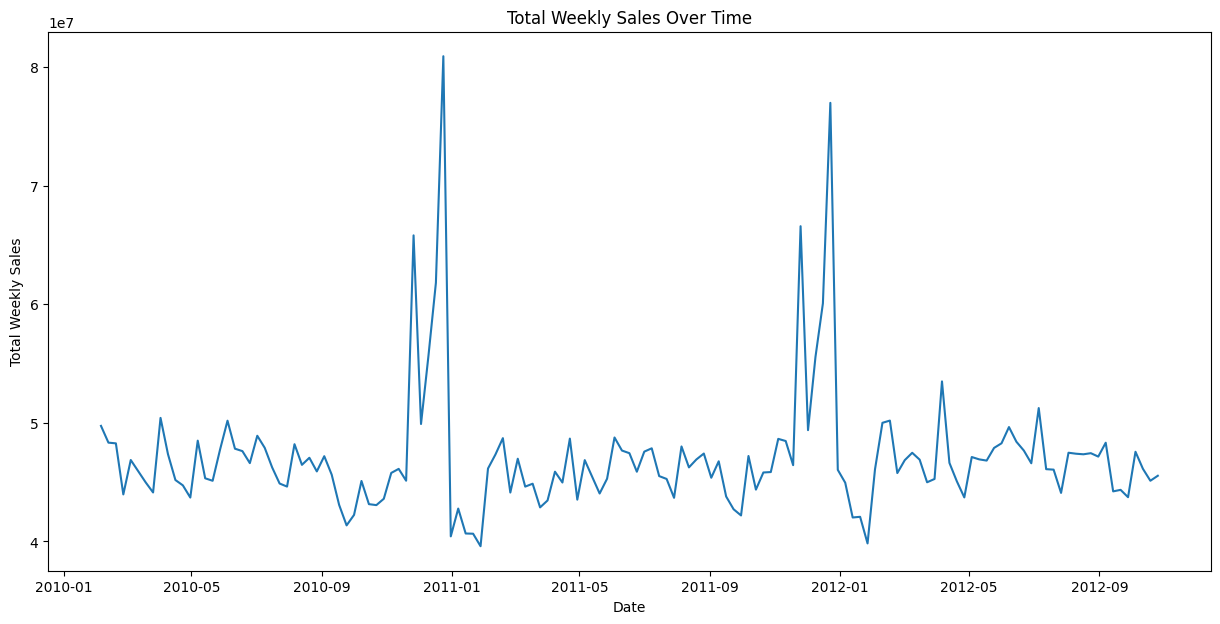

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(df.groupby("Date")["Weekly_Sales"].sum())
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")


#####Box plot of Weekly Sales by Holiday

Text(0, 0.5, 'Weekly Sales')

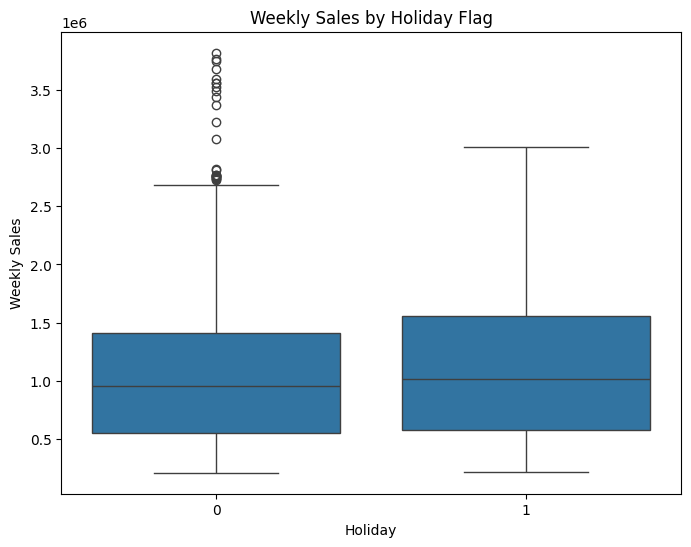

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Holiday_Flag", y="Weekly_Sales", data=df)
plt.title("Weekly Sales by Holiday Flag")
plt.xlabel("Holiday")
plt.ylabel("Weekly Sales")

#####Heatmap of correlations

Text(0.5, 1.0, 'Correlation Matrix of Numerical Variables')

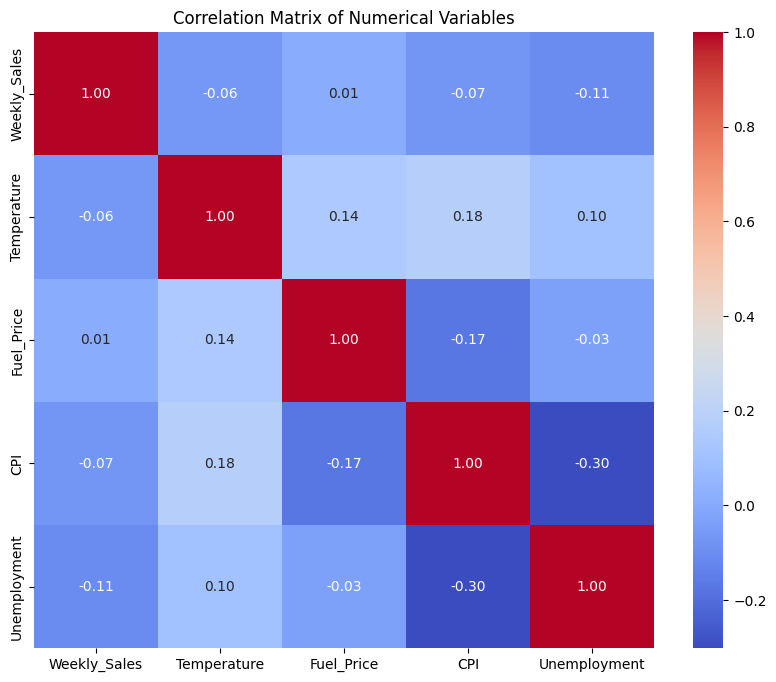

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")

###--- Statistical Analysis and Insights ---

#####T-test for Weekly Sales during Holiday vs. Non-Holiday weeks

In [21]:
holiday_sales = df[df["Holiday_Flag"] == 1]["Weekly_Sales"]
non_holiday_sales = df[df["Holiday_Flag"] == 0]["Weekly_Sales"]

In [22]:
t_stat, p_val = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False) # Welch's t-test

In [23]:
print(f"\n1. T-test for Weekly Sales (Holiday vs. Non-Holiday):")
print(f"   Mean Weekly Sales (Holiday): {holiday_sales.mean():,.2f}")
print(f"   Mean Weekly Sales (Non-Holiday): {non_holiday_sales.mean():,.2f}")
print(f"   T-statistic: {t_stat:.2f}")
print(f"   P-value: {p_val:.3f}")
if p_val < 0.05:
    print("   Conclusion: There is a statistically significant difference in weekly sales between holiday and non-holiday weeks.")
else:
    print("   Conclusion: There is no statistically significant difference in weekly sales between holiday and non-holiday weeks.")


1. T-test for Weekly Sales (Holiday vs. Non-Holiday):
   Mean Weekly Sales (Holiday): 1,122,887.89
   Mean Weekly Sales (Non-Holiday): 1,041,256.38
   T-statistic: 2.68
   P-value: 0.008
   Conclusion: There is a statistically significant difference in weekly sales between holiday and non-holiday weeks.


####Regression analysis: Weekly Sales vs. CPI, Unemployment, Temperature, Fuel_Price

In [24]:
X = df[["CPI", "Unemployment", "Temperature", "Fuel_Price"]]
y = df["Weekly_Sales"]

In [26]:
X = sm.add_constant(X) # Adding a constant for the intercept

In [27]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [28]:
print("\n2. OLS Regression Results (Weekly Sales vs. Economic Indicators):")
print(model.summary())


2. OLS Regression Results (Weekly Sales vs. Economic Indicators):
                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     40.09
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           3.21e-33
Time:                        11:32:06   Log-Likelihood:                -94273.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6430   BIC:                         1.886e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [29]:
print("\nInsights from Regression Analysis:")
print("- CPI: A positive coefficient suggests that as CPI increases, Weekly_Sales tend to increase, holding other factors constant. This might indicate inflation or economic growth driving sales.")
print("- Unemployment: A negative coefficient suggests that as Unemployment increases, Weekly_Sales tend to decrease, which is intuitive as higher unemployment generally means less disposable income.")
print("- Temperature: The coefficient for Temperature is relatively small, suggesting a minor linear relationship with Weekly_Sales. Further analysis might be needed to check for non-linear relationships or optimal temperature ranges.")
print("- Fuel_Price: A negative coefficient suggests that as Fuel_Price increases, Weekly_Sales tend to decrease. Higher fuel prices can impact consumer spending and logistics costs.")
print("- R-squared: Indicates the proportion of variance in Weekly_Sales that can be predicted from the independent variables. A higher R-squared suggests a better fit.")


Insights from Regression Analysis:
- CPI: A positive coefficient suggests that as CPI increases, Weekly_Sales tend to increase, holding other factors constant. This might indicate inflation or economic growth driving sales.
- Unemployment: A negative coefficient suggests that as Unemployment increases, Weekly_Sales tend to decrease, which is intuitive as higher unemployment generally means less disposable income.
- Temperature: The coefficient for Temperature is relatively small, suggesting a minor linear relationship with Weekly_Sales. Further analysis might be needed to check for non-linear relationships or optimal temperature ranges.
- Fuel_Price: A negative coefficient suggests that as Fuel_Price increases, Weekly_Sales tend to decrease. Higher fuel prices can impact consumer spending and logistics costs.
- R-squared: Indicates the proportion of variance in Weekly_Sales that can be predicted from the independent variables. A higher R-squared suggests a better fit.


####Weekly Sales vs. Economic Indicators and Temperature

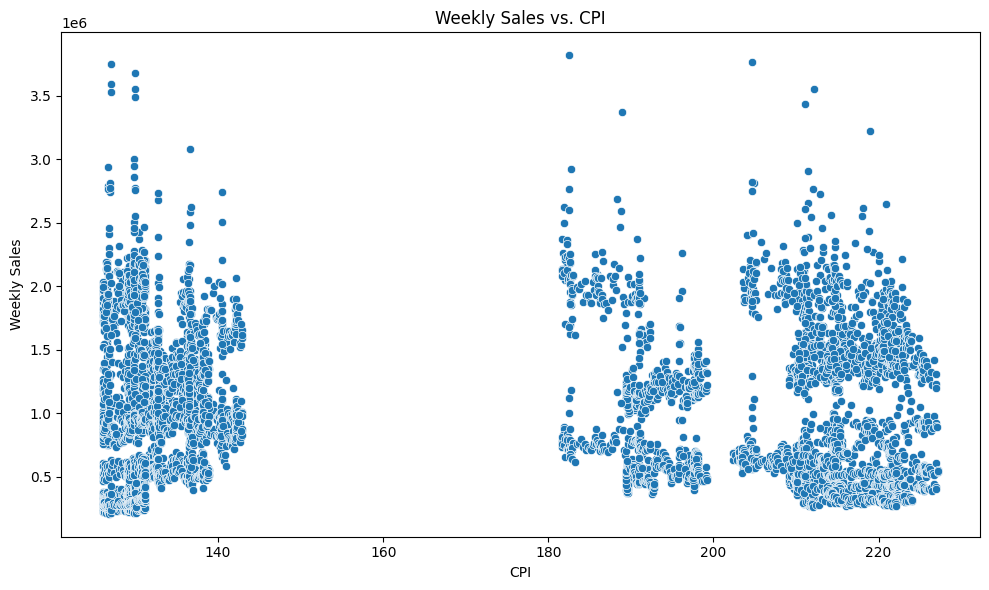

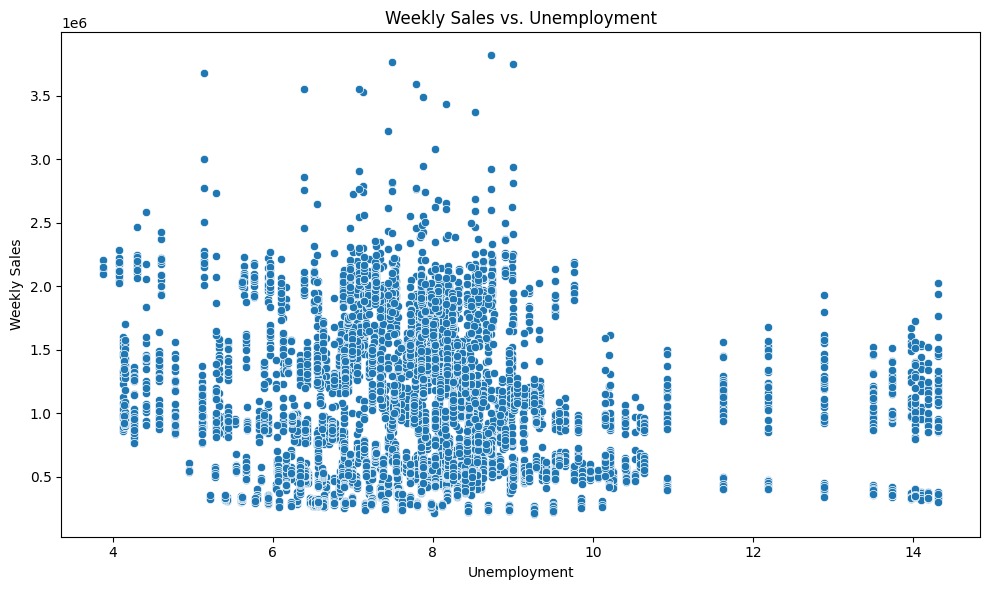

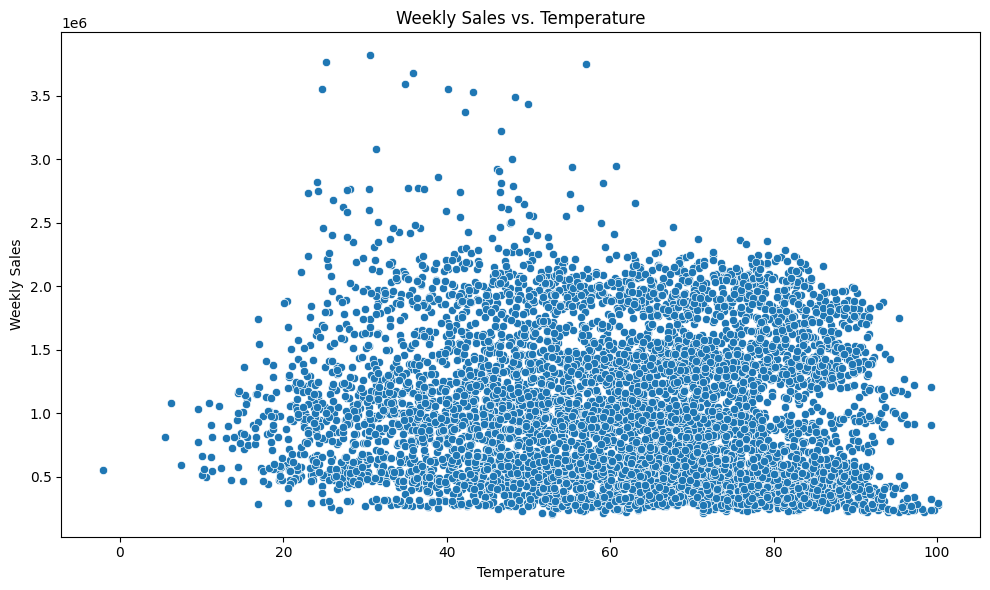

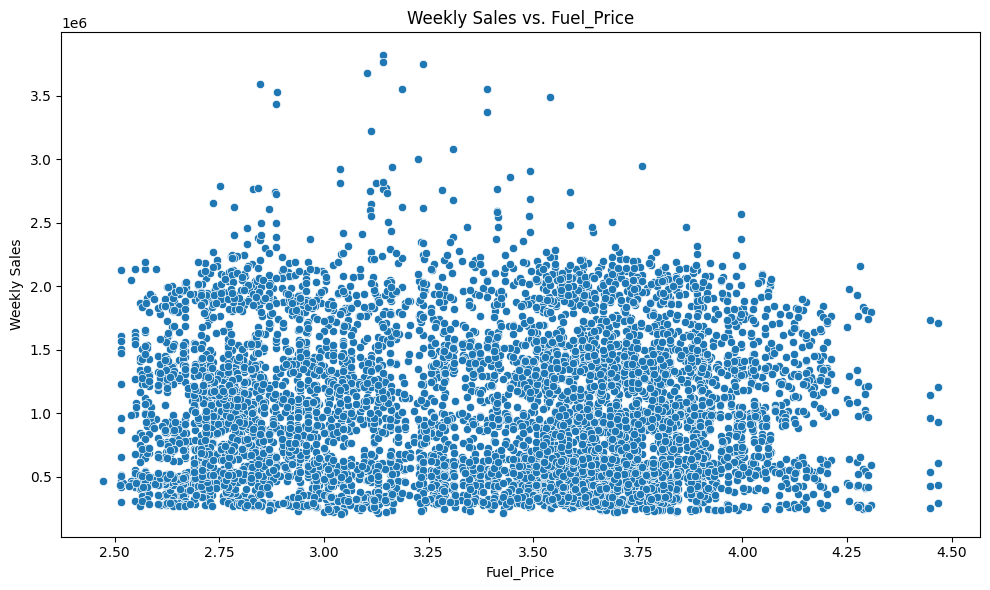

In [34]:
variables = ["CPI", "Unemployment", "Temperature", "Fuel_Price"]

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=var, y="Weekly_Sales", data=df)
    plt.title(f"Weekly Sales vs. {var}")
    plt.xlabel(var)
    plt.ylabel("Weekly Sales")
    plt.tight_layout()
    plt.show()